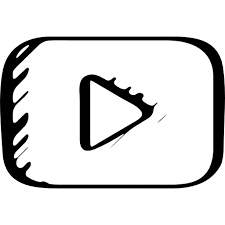

# Youtube Statystics - Test
**The following test consist of three different tasks** 
*  Finding what are categorical differences in viewing patterns betweene Germans and Indians 
*  Finding the ratios between views/likes/dislikes for different countries/categories
*  Finding channels that are popular in most countries

Before we start with  the tasks, we will import the essential packages for Data Science 

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 **Task nr1 - What are the categorical differences in viewing patterns between Germans and Indians ?** 
>  First we have to lad the data, as we are evaluating differences between Germans and Indians we will name first dataframe "germans" and second "indians".
 We will also take a look at first rows of both dataframes and their shapes to avoid complications related to structure. For that reason, I we will also extract column   names from the data. 
 

In [43]:
# We will load the data from the CSVs into two separate dataframes, get their shape to check the difference in structure
germans = pd.read_csv('../input/youtube-new/DEvideos.csv', sep=',')
indians = pd.read_csv('../input/youtube-new/INvideos.csv', sep=',')


print(f'Germans - shape: {germans.shape}')
print(f'Indians - shape: {indians.shape}')


In [44]:
germans.head()

In [45]:
# We will also look if the columns are the same for both dataframes
print(f'Germans - columns: {germans.columns}')
print('')
print(f'Indians - columns: {indians.columns}')

#germans_columns = germans.columns.to_list
#indians_columns = indians.columns.to_list
   

So far we know that there is a difference in shapes of both dataframe ***Germans - shape: (40840, 16) and Indians - shape: (37352, 16)*** Therefore we know that both dataframes have 16 columns but the germans have 3,5k records (that is videos) more than indians. We know hovewer that the structure of both dataframes is very simillar and that the column names are the same in both of them. 

As my task is to get insights about viewing patterns, the only thing I will focus on is analyzing the parts of our data frames directly correlated to those patterns (columns: trending_date, views, likes, dislikes, comment_count)

In [46]:
# First we will examine the germans average number of likes and comments under video to know how strongly they are engaging with video we will also create and compare ratios of those engagemenst
germans[['views','comment_count','likes','dislikes']].mean()


In [47]:
#We will find average engagement ratio for germany by comeparing average numbner of interactions to average number of views
germans_avg_interactions = sum(germans[['comment_count','likes','dislikes']].mean())
germans_avg_views = germans['views'].mean()

germans_engagement_ratio = (germans_avg_interactions/germans_avg_views) * 100

germans_engagement_ratio


In [48]:
#And we will also do the same for indians
indians[['views','comment_count','likes','dislikes']].mean()


In [49]:
indians_avg_interactions = sum(indians[['comment_count','likes','dislikes']].mean())
indians_avg_views = indians['views'].mean()

indians_engagement_ratio = (indians_avg_interactions/indians_avg_views) * 100

indians_engagement_ratio

In [50]:
#Now let's compare average engagement ratio for both countries
print(f'{germans_engagement_ratio/indians_engagement_ratio}')

 Above analysis shows us, that engagement ratio for germans is equal to **4.31%** and for indians around **2.96%**. Therefore on average **german videos recieve 46% more engagement than indian videos .** 
 
Now we will explore if there is a difference, when those videos are trending.

In [51]:
# We are going to sort values in the datasets by trending_date column to detect if videos in our dataframes were trending in the same time
germans = germans.sort_values(by="trending_date")
indians = indians.sort_values(by="trending_date")

indians

After sorting the dataframes we have to check if both dataframes have the time horizon of measurment. 

In [52]:
# We will chceck if germans and indians dataframes start on the same date 
print('Indians')
print(indians['trending_date'].head(3))
print('<---------------->')
print('Germans')
print(germans['trending_date'].head(3))

In [53]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,10))
plt.bar(germans['trending_date'],germans['views'], label='german')
plt.bar(indians['trending_date'], indians['views'], label='indian', color='orange', alpha=0.75)



plt.ylabel('Views', fontsize=14)
plt.xlabel('Date', fontsize =14)
plt.title("Trending Time of Vidos", fontsize=16)

plt.show()

**As we can see, the periods overlay each other, however for greater examination we will examine views for trading data on separate plots**

In [54]:
ax1 = germans.plot(y='views', x='trending_date', figsize = (20,10))
ax1.set(title='Trending times of Videos - Germany',ylabel = 'Views', xlabel = 'Date')

ax2 = indians.plot(y='views', x='trending_date', figsize = (20,10), color='orange')
ax2.set(title='Trending times of Videos - India', ylabel = 'Views', xlabel = 'Date')


**As we can see, videos weren't trending exactly in the same time for all the time. In individual dates Germany as well as India registered sudden jumps in their view count. The first two quaters of 2017 recodred maximum view counts for individual dates for both countries.**

**We will also check the amount of views for a different measures of the view structure to see precisely the difference between those two countries**.

In [55]:
print("Germans:")

print(f"Germans max views : {germans['views'].max()}")
print(f"Germans min views : {germans['views'].min()}")
print(f"Germans cumulative views : {germans['views'].sum()}")
print(f"Germans average views : {germans['views'].mean()}")
print(f"Germans median views : {germans['views'].median()}")

print("")
print("Indians: ")

print(f"Indians max views : {indians['views'].max()}")
print(f"Indians min views : {indians['views'].min()}")
print(f"Indians cumulative views : {indians['views'].sum()}")
print(f"Indians average views : {indians['views'].mean()}")
print(f"Indians median views : {indians['views'].median()}")


#We will also print differences 
print("")
print("Differences: ")

print(f"Difference max views : {indians['views'].max() - germans['views'].max()}")
print(f"Difference min views : {indians['views'].min() - germans['views'].min()}")
print(f"Difference cumulative views : {indians['views'].sum() - germans['views'].sum()} | in percentage {(germans['views'].sum() / indians['views'].sum()) *100}%")
print(f"Difference average views : {indians['views'].mean() - germans['views'].mean()} | in percentage {(germans['views'].mean() / indians['views'].mean()) *100}%")
print(f"Difference median views : {indians['views'].median() - germans['views'].median()} | in percentage {(germans['views'].median() / indians['views'].median()) *100}%")

#We will also print percentages for germans

print("")

print(f"Germans obtained {round((germans['views'].max() / indians['views'].max()),2) *100}% of indians max views ")
print(f"Germans obtained {round((germans['views'].min() / indians['views'].min()),2) *100}% of indians min views ")
print(f"Germans obtained {round((germans['views'].sum() / indians['views'].sum()),2) *100}% of indians cummulative views ")
print(f"Germans obtained {round((germans['views'].mean() / indians['views'].mean()),1) *100}% of indians mean views ")
print(f"Germans obtained {round((germans['views'].median() / indians['views'].median()),2) *100}% of indians median views ")

The statystics shows that there is significant difference between conuntry's most and worst performing videos. Indians best performing video has 11556020 more views than German best performing video, Indians also have 3,5k more views under their worst performing video. There is almost **15 billion views** difference in cummulative number of views for both countries. Indians also have higher number of average views and the median view count for them is larger by almost 20k.

Those statistics are not suprising though. According to [worldometers.io](https://www.worldometers.info/)
, India is the country with 1.4 billion people while germany has 84 million people. The average age for an indian is 29 years old while in germany the average age is 45 years old. Younger genereations have a tendency to adopt to new technologies (including mobile) that are the main trafic driving sources for social media platforms in todays world ([research.com](http://https://research.com/software/mobile-vs-desktop-usage)).   

Neverthless, germany's audience is stronger in sense as they are able to obtain almost 40% of indians median views and 60% of their mean views, even though india has 15 times more people than germany. 

We can also examine how those statistics look in different percentiles. **Below table also show us standard deviation** (mesurment of diference from average value), we can see that its a little bit higher for germans

In [56]:
germans.describe()

In [57]:
indians.describe()

# Task nr 2
* **Compare ratios of views,likes,dislikes for different categories/countries.**
* **Is it easier for musicians to collect likes than for politicians ?**
* **What is the sentiment to videos between Mexicans and Brits ?**

In [58]:
# To open all csv's at once we are gona use loop thrugh list of all the csv files in our directory to access each of them, then we will create dataframe from them.
import glob
files = [i for i in glob.glob('../input/youtube-new/*.csv')]
sorted(files)



In [59]:
dfs = list()
for csv in files:
    df = pd.read_csv(csv,encoding='latin1')
    df['country'] = csv[21:23]
    dfs.append(df)

all_df = pd.concat(dfs)
all_df.head(3)

In [60]:
#List of unique countries

countries = all_df.country.unique()

countries = countries.tolist()
countries

In [61]:
#List of unique codes
categories = all_df.category_id.unique()

categories = categories.tolist()
categories = sorted(categories) 
categories


In [62]:

#Load the json the files:
files = [i for i in glob.glob('../input/youtube-new/*.json')]
sorted(files)

dfs = list()
for json in files:
    df = pd.read_json(json)
    df['country'] = json[21:23]
    dfs.append(df)

jsons_df = pd.concat(dfs)
jsons_df.head(3)



In [63]:
#As categories_id is sorted and values from cv are 
cn = {category['id']: category['snippet']['title'] for category in jsons_df['items']}

categories_names = list()

for key in categories:
    categories_names.append(cn.get(f'{key}'))
    
categories_names

**We will mark the ratios as follows**:
* L2V - Likes to views
* D2V - Dislikes to views
* L2D - Likes to Dislikes

In [64]:
#Compare ratios for different countries

gcountry_df = all_df.groupby('country', as_index=False).sum()


gcountry_df.loc[gcountry_df['country']=='CA']

list_of_views = list()
list_of_likes = list()
list_of_dislikes = list()

Ratio_df = pd.DataFrame()


for c in range(len(countries)):
    x = int(gcountry_df[gcountry_df['country']==f'{countries[c]}'].views)
    y = int(gcountry_df[gcountry_df['country']==f'{countries[c]}'].likes)
    z = int(gcountry_df[gcountry_df['country']==f'{countries[c]}'].dislikes)
    list_of_views.append(x)
    list_of_likes.append(y)
    list_of_dislikes.append(z)
    
ratio_df = pd.DataFrame({'country':countries, 'views': list_of_views, 'likes': list_of_likes, 'dislikes': list_of_dislikes})
ratio_df.head()

ratio_df['L2V'] = ratio_df['likes']/ratio_df['views']
ratio_df['D2V'] = ratio_df['dislikes']/ratio_df['views']
ratio_df['L2D'] = ratio_df['likes']/ratio_df['dislikes']


ratio_df
 
    

As we can see in the first two rows, british have significantly lower count of likes to dislikes (they have 17.5 times more likes than dislikes) in commparison to the Mexicans (they have 21.2 times more likes than dislikes) 

In [65]:
# We need a list of all categories
category_df = all_df.groupby('category_id', as_index=False).sum()
category_df.head(20)

In [66]:

category_df = all_df.groupby('category_id', as_index=False).sum()


list_of_views = list()
list_of_likes = list()
list_of_dislikes = list()


for c in range(len(categories)):
    x = (category_df[category_df['category_id'] == categories[c]]).views.values
    y = (category_df[category_df['category_id'] == categories[c]]).likes
    z = (category_df[category_df['category_id'] == categories[c]]).dislikes
    
    list_of_views.append(int(x))
    list_of_likes.append(int(y))
    list_of_dislikes.append(int(z))
    

ratio_categories_df = pd.DataFrame({'category_id':categories, 'views': list_of_views, 'likes': list_of_likes, 'dislikes': list_of_dislikes})

ratio_categories_df['L2V'] = ratio_categories_df['likes']/ratio_categories_df['views']
ratio_categories_df['D2V'] = ratio_categories_df['dislikes']/ratio_categories_df['views']
ratio_categories_df['L2D'] = ratio_categories_df['likes']/ratio_categories_df['dislikes']


ratio_categories_df = ratio_categories_df.sort_values(by='category_id') 
ratio_categories_df.insert(1,'category_name', categories_names) 

ratio_categories_df
    
    


In [67]:
#Check if it is easier to collect likes for musicians than for politicians ? 
#To do that we have to detect all music channels and all political channels

music = int(ratio_categories_df[ratio_categories_df['category_name'] == 'Music']['views'].values)

politics = int(ratio_categories_df[ratio_categories_df['category_name'] == 'News & Politics']['views'].values)


print(f'Cumulative views in Music category : {music}')

print("")

print(f'Cumulative views in Politics category: {politics}')
print("")

if music > politics:
    print(f'Its easier to get views in Music, than in Politics ')
else:
    print(f'Its easier to get views in Politics, than in Music')


 **Musicians obtained 255967088943** views and **politicians 10422502991**. 
Based on that data we can conclude, that it is significantly harder for politicians to obtain views in comparison to musicians. **About 24,5 times more difficult to be exact**.

# Running task nr 3

**Select channels that are popular in most countries.**
> There is essentialy couple of ways we can approach this problem. One of them is to find top channels from a given contry and check if any of those channels are also popular in other countries. The other method is to set some benchmark (cumulative views for the channel), that will help to estimate if a channel is popular or not. Both approaches have theirs pros and cons as the first one lets us find channels that recive their views from truly international audience but cannot gurantee that the channel will apear in majority of examined countries so the research might not be worth the effort. Second method however doesn't specify the country from which the views are comeing from so we can only guess that the channel is internationally popular bcause of its amount outstanding amount of views. We will therefore combine both approaches for the best result

In [68]:
#Ratios agin

gcountry_df = all_df.groupby('country', as_index=False).sum()
gcountry_df.head()


In [69]:
#Find channels with most uploads (One row in our dataframe is one video)

top_uploaders = all_df['channel_title'].value_counts()
top_uploaders.head(10)

We will try to find our benchmark by using percentiles. 90th percentile is a good estimate as it will separate 10% of most popular videos from the rest.

In [70]:
df = all_df.sort_values(by='views', ascending=True)
df['views'].quantile(0.90)

We can see that the 90th percentile is around 2million, therefore that is gonna be our benchmark for entry

In [71]:


df = all_df.sort_values(by='views', ascending=True)

gruped = df.groupby(['country','channel_title'], as_index=False).sum()
gruped.drop(['comment_count','comments_disabled','ratings_disabled','video_error_or_removed'], axis=1, inplace=True)



list_of_df = []

# The following function will help us find channels from a given country with a specific condition

def FindPopular():
    for c in countries:
        #This conditions specifies that the channel must at least ten million views to be considered popular
        condition = gruped['views'] >= 20000000
        c = gruped[(gruped['country'] == f'{c}') & (condition)]
        df = pd.DataFrame(c).sort_values(by='views', ascending= False).head(100)
        list_of_df.append(df)

FindPopular()    


Now, when we have a list of dataframes with top 10% of channels by views from every country, we can create one big dataframe out of them and find which channels are occurning the most in it. Therefore we will find countries that are popular in m

In [72]:
#Lets find 30 most viewed channels in  multiple countries
concat_df = pd.concat(list_of_df)
most_viewed = concat_df['channel_title'].value_counts()
most_viewed.head(30)
    
    

**Now we can visualize those channel names in a form of word cloud**

In [107]:
to_word_cloud = most_viewed.head(30).index.to_list()
to_word_cloud

In [120]:
#convert it to dictionary with values and its occurences
from wordcloud import WordCloud
from collections import Counter


word_could_dict=Counter(to_word_cloud)
wordcloud = WordCloud(width = 1200, height = 500, background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

